#**ZOMATO DATASET ANALYSIS AND POPULARITY PREDICTION OF A RESTAURANT**

#**PART-1 EDA PART-2 NLP PART-3 MODEL BUILDING**

#**EXPLORATORY** **DATA** **ANALYSIS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
d=pd.read_csv("/content/drive/MyDrive/zomato.csv")

In [ ]:
df=d.copy()

In [ ]:
len(df)

51717

In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
print(df['rest_type'].unique())
print(df['listed_in(city)'].unique())
print(df['listed_in(type)'].unique())

['Casual Dining' 'Cafe, Casual Dining' 'Quick Bites' 'Casual Dining, Cafe'
 'Cafe' 'Quick Bites, Cafe' 'Cafe, Quick Bites' 'Delivery' 'Mess'
 'Dessert Parlor' 'Bakery, Dessert Parlor' 'Pub' 'Bakery'
 'Takeaway, Delivery' 'Fine Dining' 'Beverage Shop' 'Sweet Shop' 'Bar'
 'Beverage Shop, Quick Bites' 'Confectionery' 'Quick Bites, Beverage Shop'
 'Dessert Parlor, Sweet Shop' 'Bakery, Quick Bites'
 'Sweet Shop, Quick Bites' 'Kiosk' 'Food Truck'
 'Quick Bites, Dessert Parlor' 'Beverage Shop, Dessert Parlor' 'Takeaway'
 'Pub, Casual Dining' 'Casual Dining, Bar' 'Dessert Parlor, Beverage Shop'
 'Quick Bites, Bakery' 'Dessert Parlor, Quick Bites'
 'Microbrewery, Casual Dining' 'Lounge' 'Bar, Casual Dining' 'Food Court'
 'Cafe, Bakery' nan 'Dhaba' 'Quick Bites, Sweet Shop' 'Microbrewery'
 'Food Court, Quick Bites' 'Pub, Bar' 'Casual Dining, Pub' 'Lounge, Bar'
 'Food Court, Dessert Parlor' 'Casual Dining, Sweet Shop'
 'Food Court, Casual Dining' 'Casual Dining, Microbrewery'
 'Sweet Shop, Desser

In [ ]:


df['num_cuisines'] = df['cuisines'].str.split(',').str.len()


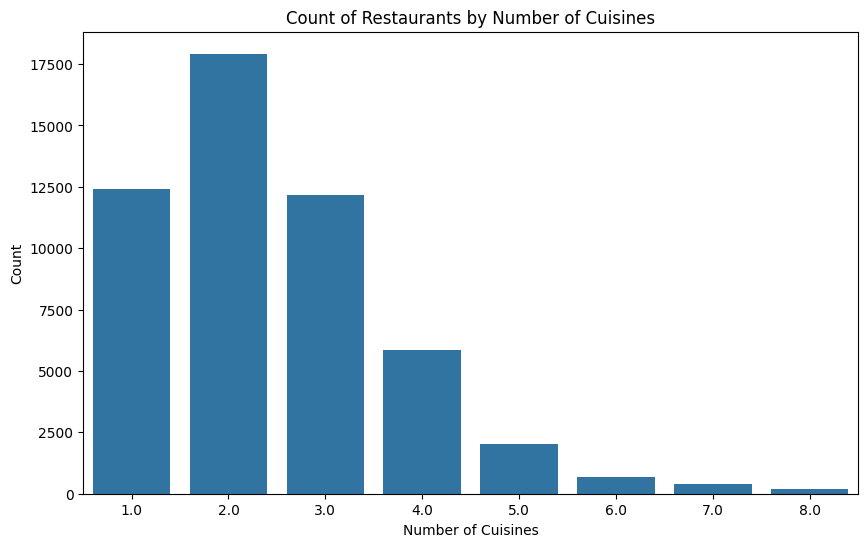

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='num_cuisines', data=df)
plt.title('Count of Restaurants by Number of Cuisines')
plt.xlabel('Number of Cuisines')
plt.ylabel('Count')
plt.show()


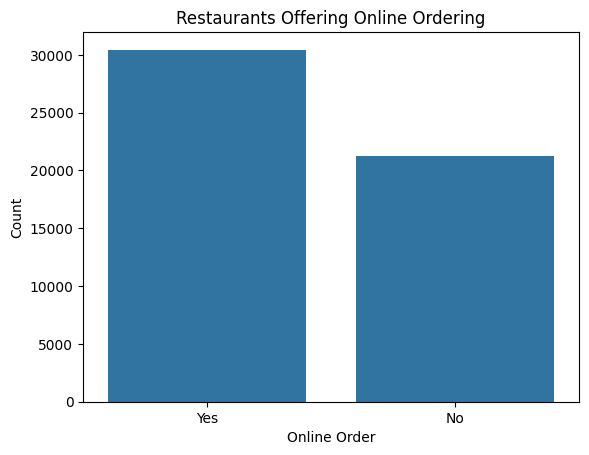

In [ ]:
online_order_counts = df['online_order'].value_counts()
plt.figure()
sns.countplot(x='online_order', data=df)
plt.title('Restaurants Offering Online Ordering')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.show()


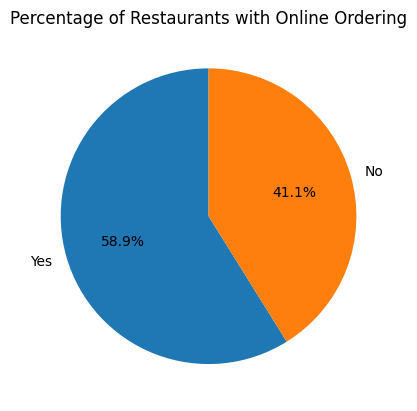

In [ ]:
online_order_percentage = df['online_order'].value_counts(normalize=True) * 100
plt.figure()
plt.pie(online_order_percentage, labels=online_order_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Restaurants with Online Ordering')
plt.show()

<ipython-input-247-518ddf49bc53>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chains,y=chains.index,palette='deep')


Text(0.5, 0, 'Number of outlets')

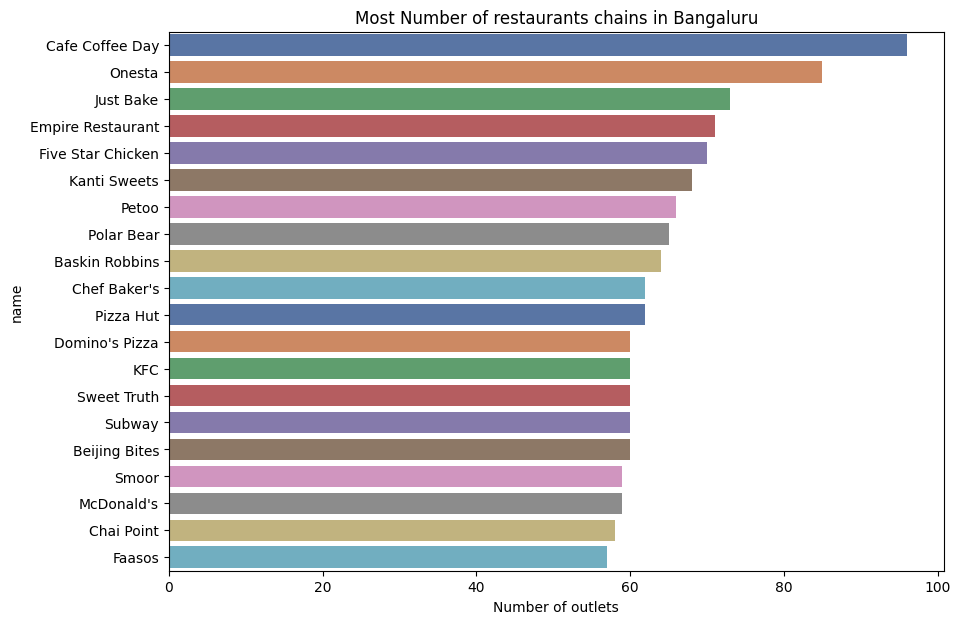

In [ ]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most Number of restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")

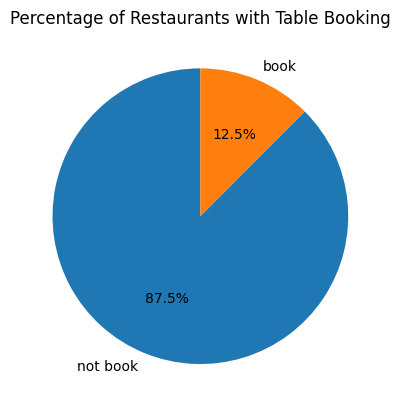

In [ ]:
x=df['book_table'].value_counts()
labels=['not book','book']
plt.pie(x,labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Restaurants with Table Booking')
plt.show()

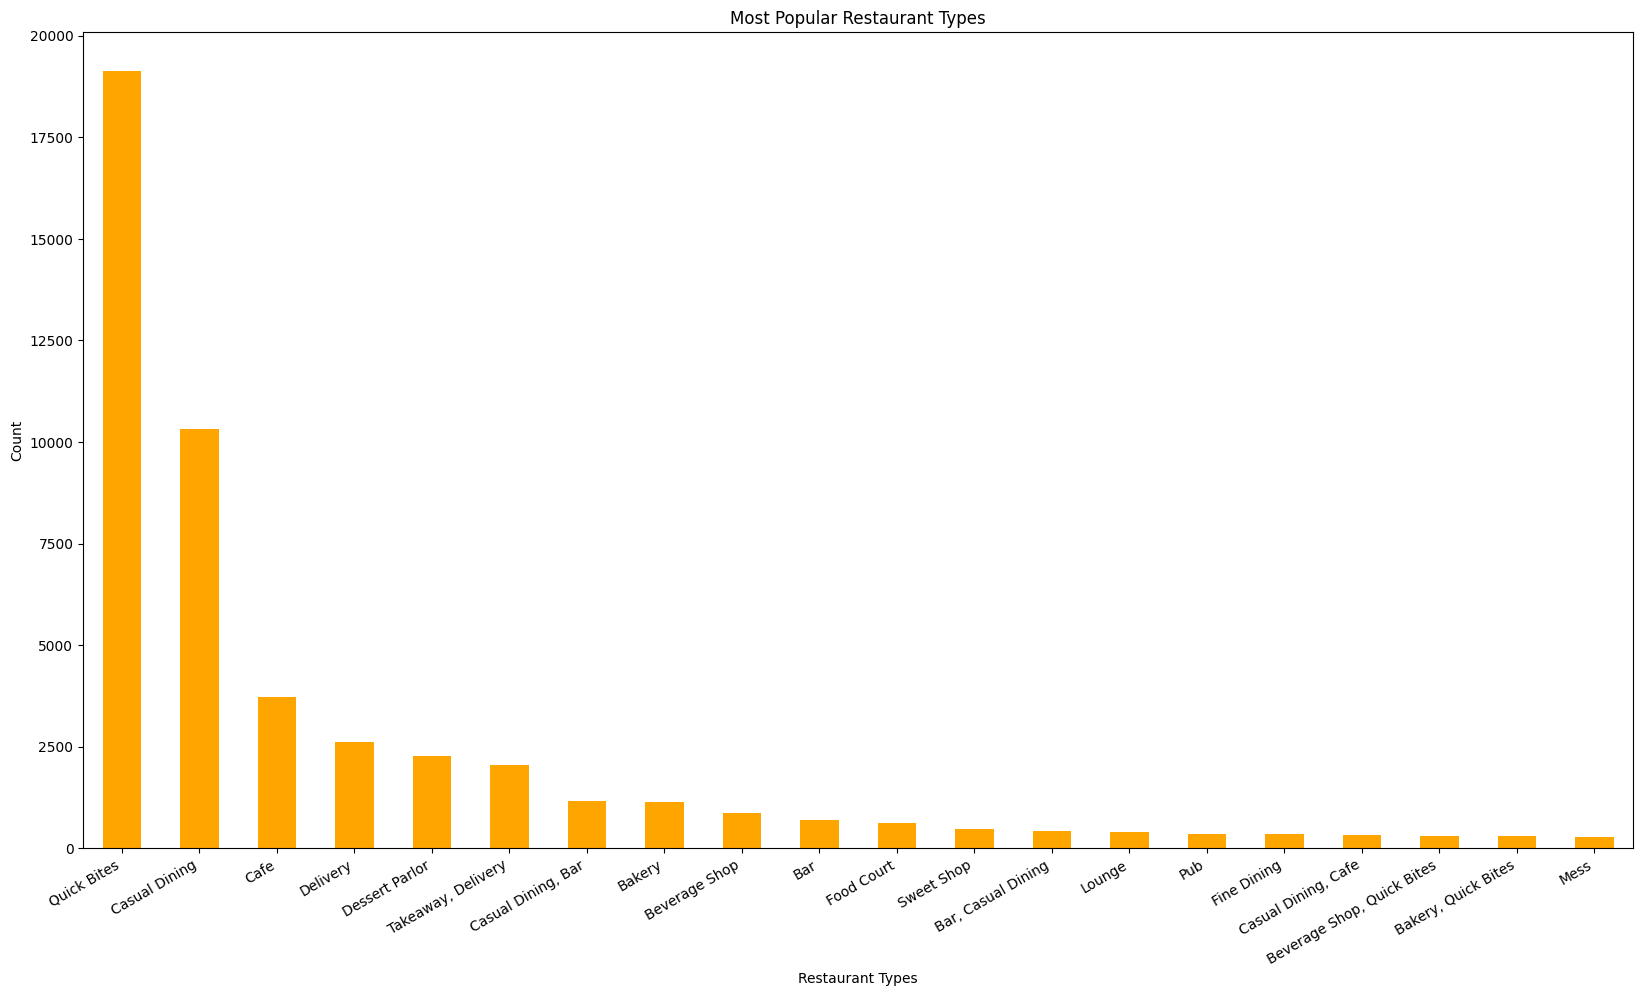

In [ ]:
plt.figure(figsize=(20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='orange')
plt.title('Most Popular Restaurant Types')
plt.xlabel('Restaurant Types')
plt.ylabel('Count')
plt.gcf().autofmt_xdate()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

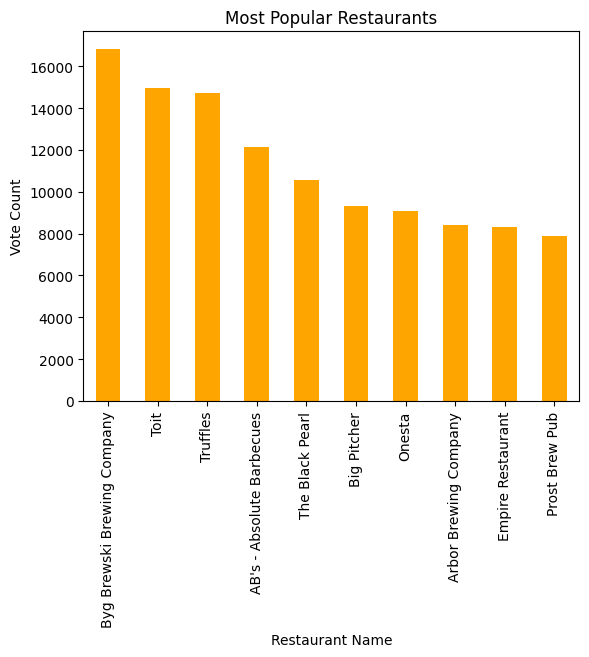

In [ ]:
df.groupby('name')['votes'].max().nlargest(10).plot.bar(color='orange')
plt.title('Most Popular Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Vote Count')
plt


In [ ]:
df.groupby('location')['name'].unique()


location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, 9 ...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafe, Night Diaries, LocalHost, AB's ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka            [Prashanth Naati Corner, Red Chillies Curries ...
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 93, dtype: object

In [ ]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [ ]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10).style.background_gradient(cmap="Wistia")


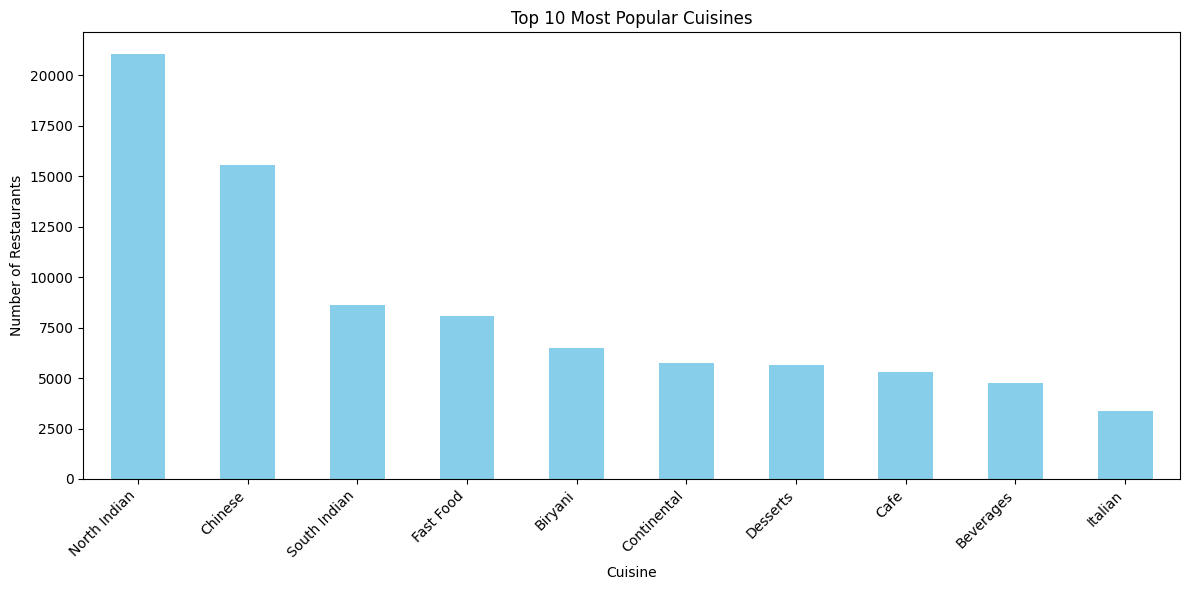

In [ ]:
cuisine_list = df['cuisines'].str.split(', ').explode()

# Count the occurrences of each cuisine
cuisine_counts = cuisine_list.value_counts()

# Visualize the top 10 most popular cuisines using a bar plot
plt.figure(figsize=(12, 6))
cuisine_counts[:10].plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
location_counts = df['location'].value_counts()
top_10_locations = location_counts.head(10)
print(top_10_locations)

location
BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Indiranagar              2083
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1630
Bellandur                1286
Name: count, dtype: int64


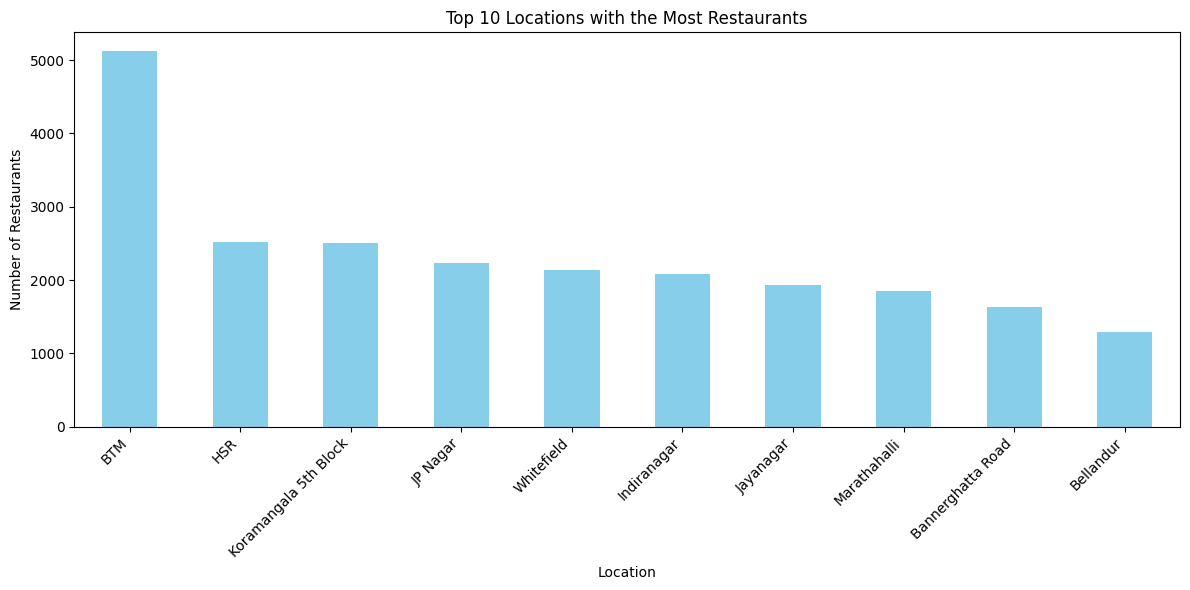

In [ ]:
plt.figure(figsize=(12, 6))
top_10_locations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Locations with the Most Restaurants')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
def plot_distribution_overlay(df, attribute):
    '''
    Funtion to plot distribution graph of one plot on top of another

    Input:
     - df : Dataframe containing restuarants details
     - attribute : attribute with which online ordering needs to be tested

     Output:
     - Provide overlay distribution plot

    '''

    sns.distplot(df[df['online_order']==0][attribute].values, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = 'Online')
    sns.distplot(df[df['online_order']==1][attribute].values, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = 'Offline')

    plt.title('online_order vs. {} '.format(attribute), fontsize=25)
    plt.xlabel(attribute, fontsize=20)
    plt.show()

<ipython-input-257-eb994a74d0b7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['online_order']==0][attribute].values, hist = False, kde = True,
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2464: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error i

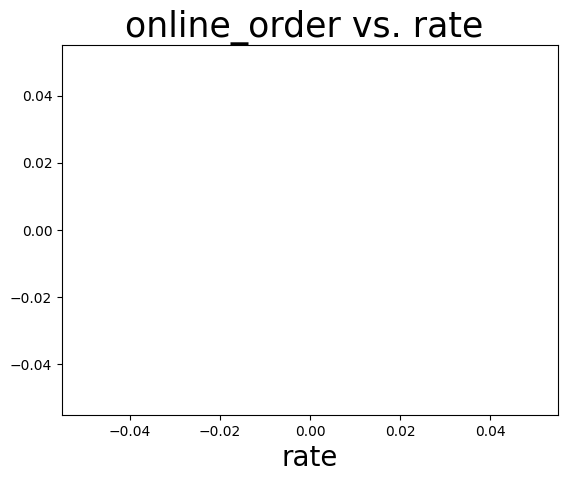

In [ ]:
plot_distribution_overlay(cleaned_df, 'rate')

In [ ]:
location_restaurant_counts = df.groupby('location')['name'].nunique()
top_10_unique_restaurants = location_restaurant_counts.sort_values(ascending=False).head(10)
print(top_10_unique_restaurants)

location
Whitefield           824
BTM                  699
Electronic City      696
HSR                  684
Marathahalli         659
Indiranagar          526
JP Nagar             502
Bannerghatta Road    448
Jayanagar            352
Bellandur            349
Name: name, dtype: int64


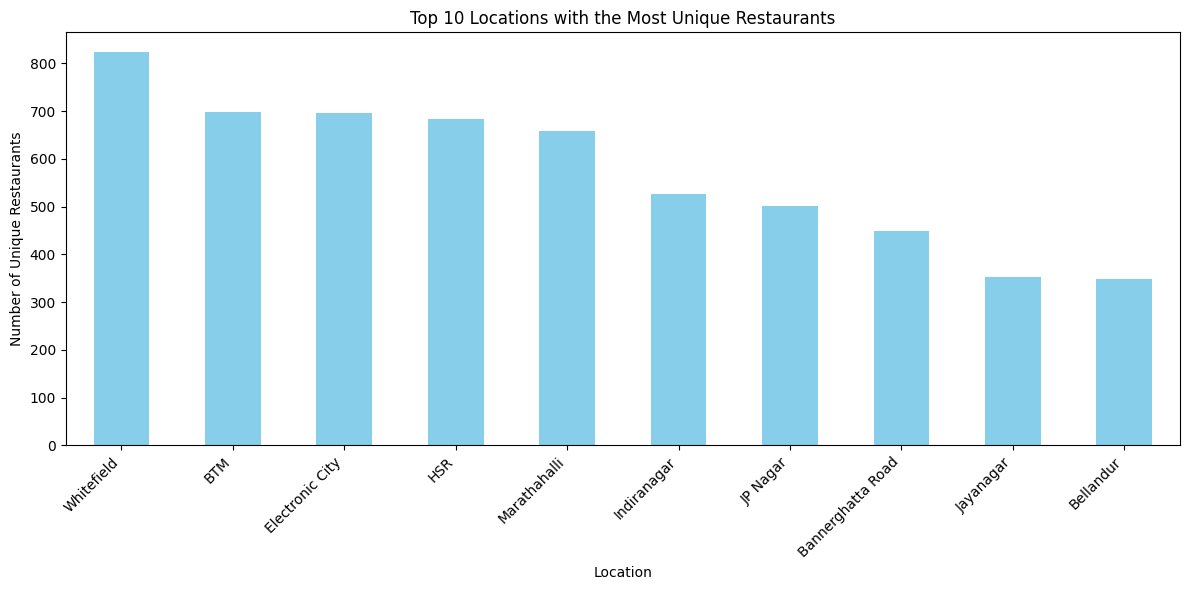

In [ ]:
plt.figure(figsize=(12, 6))
top_10_unique_restaurants.plot(kind='bar', color='skyblue')
plt.title('Top 10 Locations with the Most Unique Restaurants')
plt.xlabel('Location')
plt.ylabel('Number of Unique Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

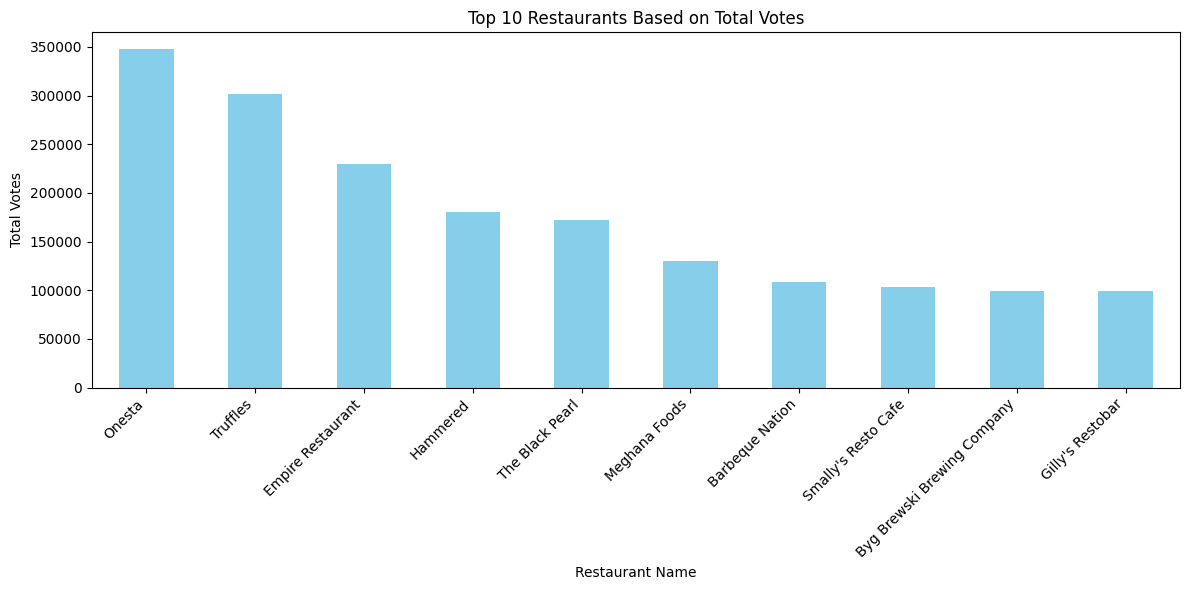

In [ ]:
top_10_restaurants_by_votes = df.groupby('name')['votes'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
top_10_restaurants_by_votes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Restaurants Based on Total Votes')
plt.xlabel('Restaurant Name')
plt.ylabel('Total Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

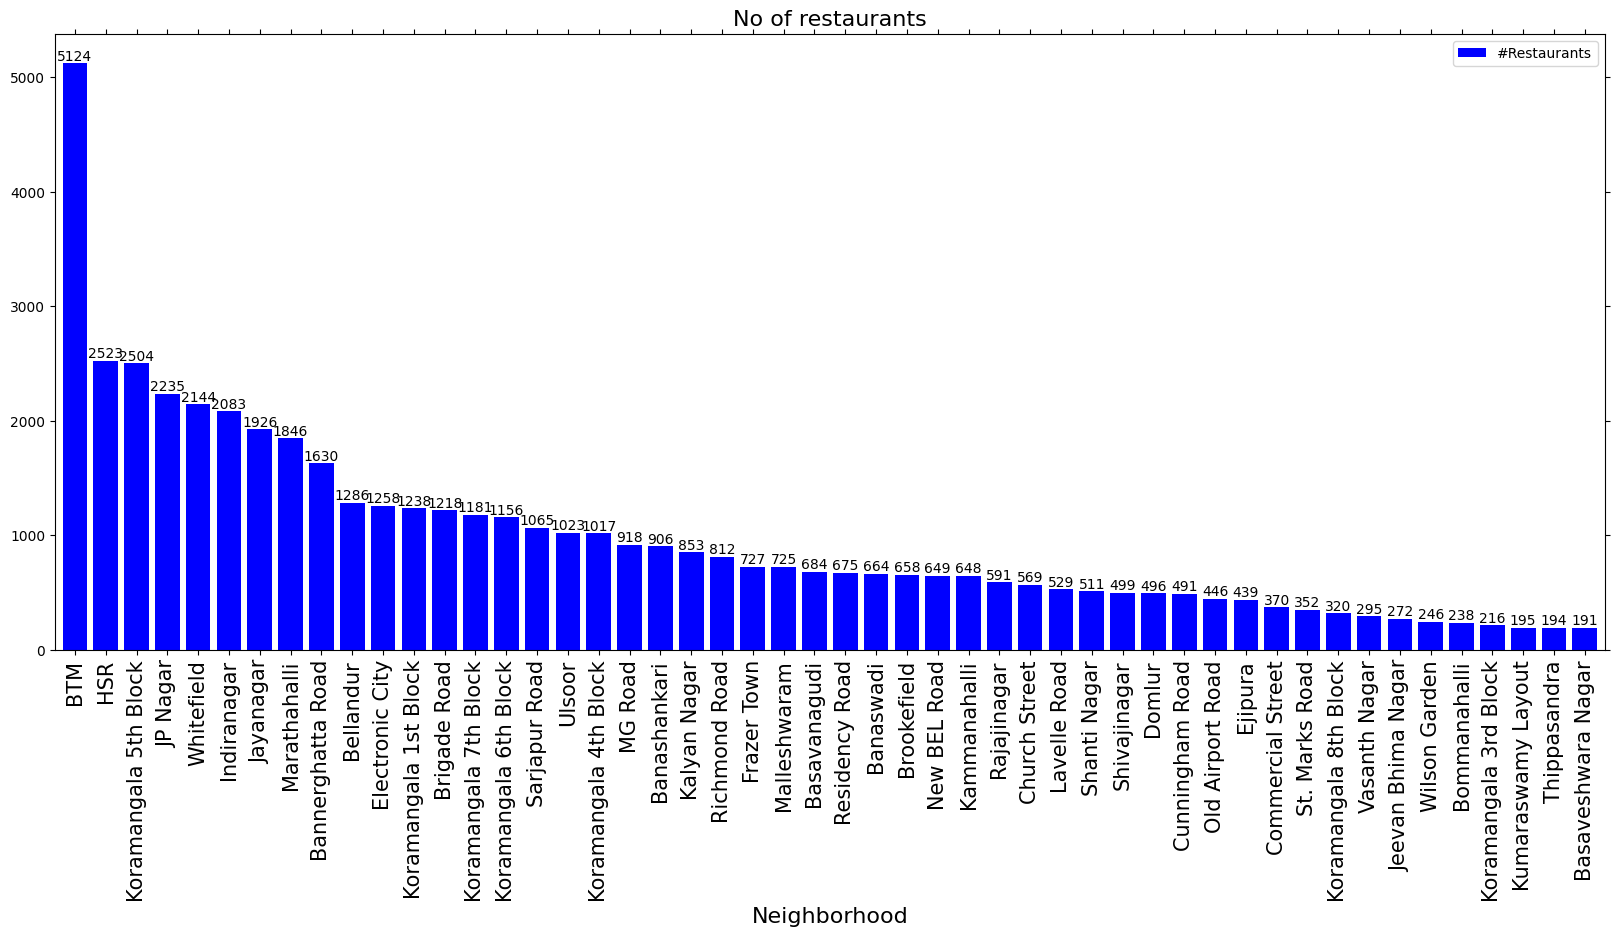

In [ ]:
histo = df.groupby('location')['url'].count().sort_values(ascending=False)[:50]
ax = histo.plot(kind='bar', figsize=(20, 8), rot=90, width = 0.8, color=[ 'blue'])
rects = ax.patches
labels = list(histo)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .05, label,
            ha='center', va='bottom', fontsize=10)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') # remove borders
ax.xaxis.set_tick_params(labelsize=15) # set xticks as 14
ax.legend(fontsize=14) # set legend sie as 14
ax.set_title('No of restaurants', fontsize=16) # set title and add font size as 16
ax.set_xlabel('Neighborhood', fontsize=16)
#ax.grid(False)  # remove grid
ax.set_facecolor("white") # set bg color white
ax.legend(['#Restaurants'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         43942 non-null  object 
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  object 
 13  reviews_list    

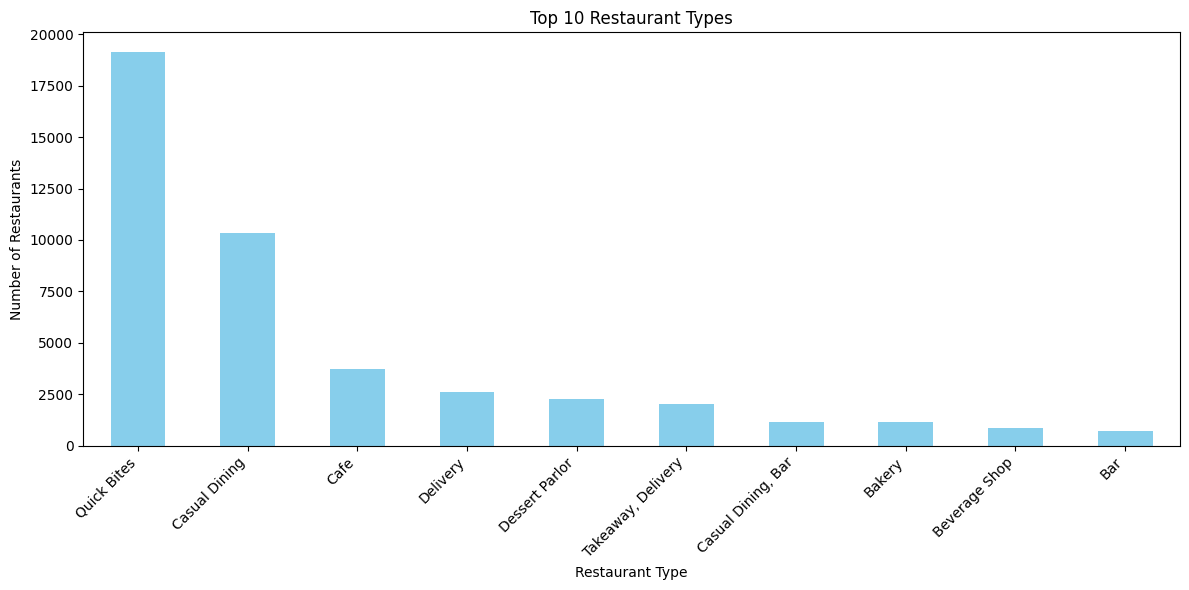

In [ ]:
import matplotlib.pyplot as plt
top_10_restaurant_types = df['rest_type'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_10_restaurant_types.plot(kind='bar', color='skyblue')
plt.title('Top 10 Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
df = df.drop(['cuisines'], axis=1)


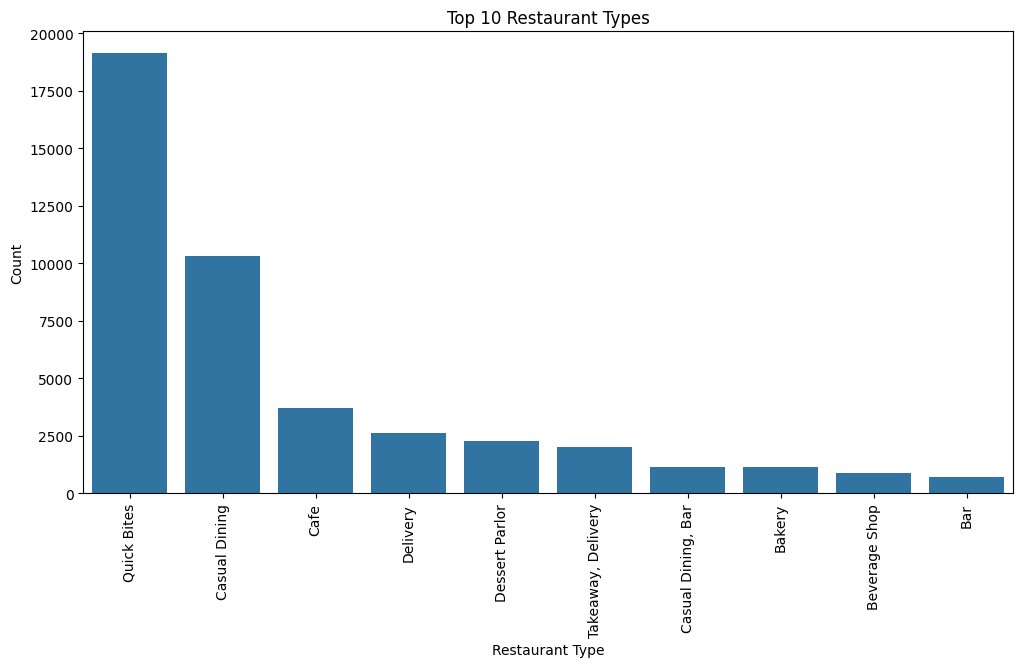

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'rest_type' is the column you want to plot
# Count the occurrences of each 'rest_type'
rest_type_counts = df['rest_type'].value_counts()

# Select the top 10 most frequent restaurant types
top_10_rest_types = rest_type_counts.head(10)

# Create a countplot using Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(x='rest_type', data=df, order=top_10_rest_types.index)
plt.xticks(rotation=90)
plt.title('Top 10 Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.show()


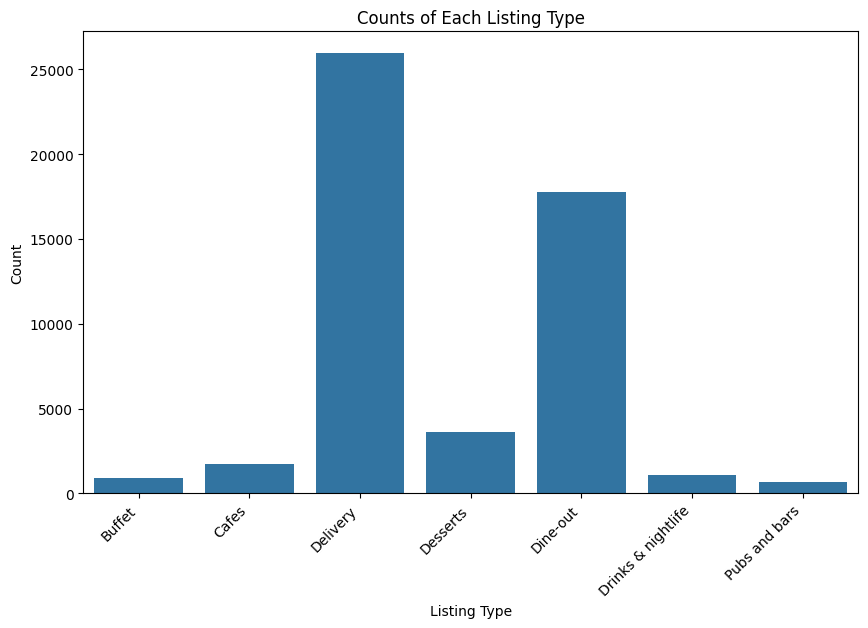

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='listed_in(type)', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Listing Type')
plt.ylabel('Count')
plt.title('Counts of Each Listing Type')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         43942 non-null  object 
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  approx_cost(for two people)  51371 non-null  object 
 12  reviews_list                 51717 non-null  object 
 13  menu_item       

#**NATURAL LANGUAGE PROCESSING(NLP) ON USER REVIEWS**

In [ ]:
!pip install nltk
!pip install keras
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from plotly import tools
import re
from plotly.offline import init_notebook_mode, plot, iplot
from wordcloud import WordCloud, STOPWORDS
from warnings import filterwarnings
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
filterwarnings('ignore')
import os
from sklearn.model_selection import train_test_split
from nltk.corpus import RegexpTokenizer as regextoken
from nltk.corpus import stopwords
from nltk import FreqDist, bigrams, trigrams
from nltk import WordNetLemmatizer
%matplotlib inline
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
import gensim
from gensim.models.keyedvectors import KeyedVectors
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Embedding, Conv1D, MaxPooling1D, Dropout, LSTM, GRU
from tensorflow.keras.regularizers import l1, l2
from sklearn.metrics import classification_report
from matplotlib import rcParams
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dfupd = pd.read_csv('/content/drive/MyDrive/zomato.csv')
data2 = dfupd.copy()
zomato = pd.read_csv("/content/drive/MyDrive/zomato.csv", na_values = ["-", ""])
# Making a copy of the data to work on
data = zomato.copy()
dfupd.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [ ]:
dfupd['update_dish_liked']=dfupd['dish_liked'].apply(lambda x : x.split(',') if type(x)==str else [''])
rest=dfupd['rest_type'].value_counts()[:9].index
dfupd.dropna(axis='index',subset=['rest_type'],inplace=True)
dfupd.dropna(axis='index',subset=['dish_liked'],inplace=True)
def produce_wordcloud(rest):
    plt.figure(figsize=(15,25))
    for i,restaurant in enumerate(rest):
        plt.subplot(3,3,i+1)
        dishes=''
        data=dfupd[dfupd['rest_type']==restaurant]
        for word in data['dish_liked']:
            words=word.split()
            # Converts each token into lowercase
            for i in range(len(words)):
                words[i] = words[i].lower()
            dishes=dishes+ " ".join(words)+" "
        wordcloud = WordCloud(max_font_size=None, colormap="summer", collocations=False,stopwords = stopwords,width=1200, height=1200).generate(dishes)
        plt.imshow(wordcloud)
        plt.title(restaurant)
        plt.axis("off")

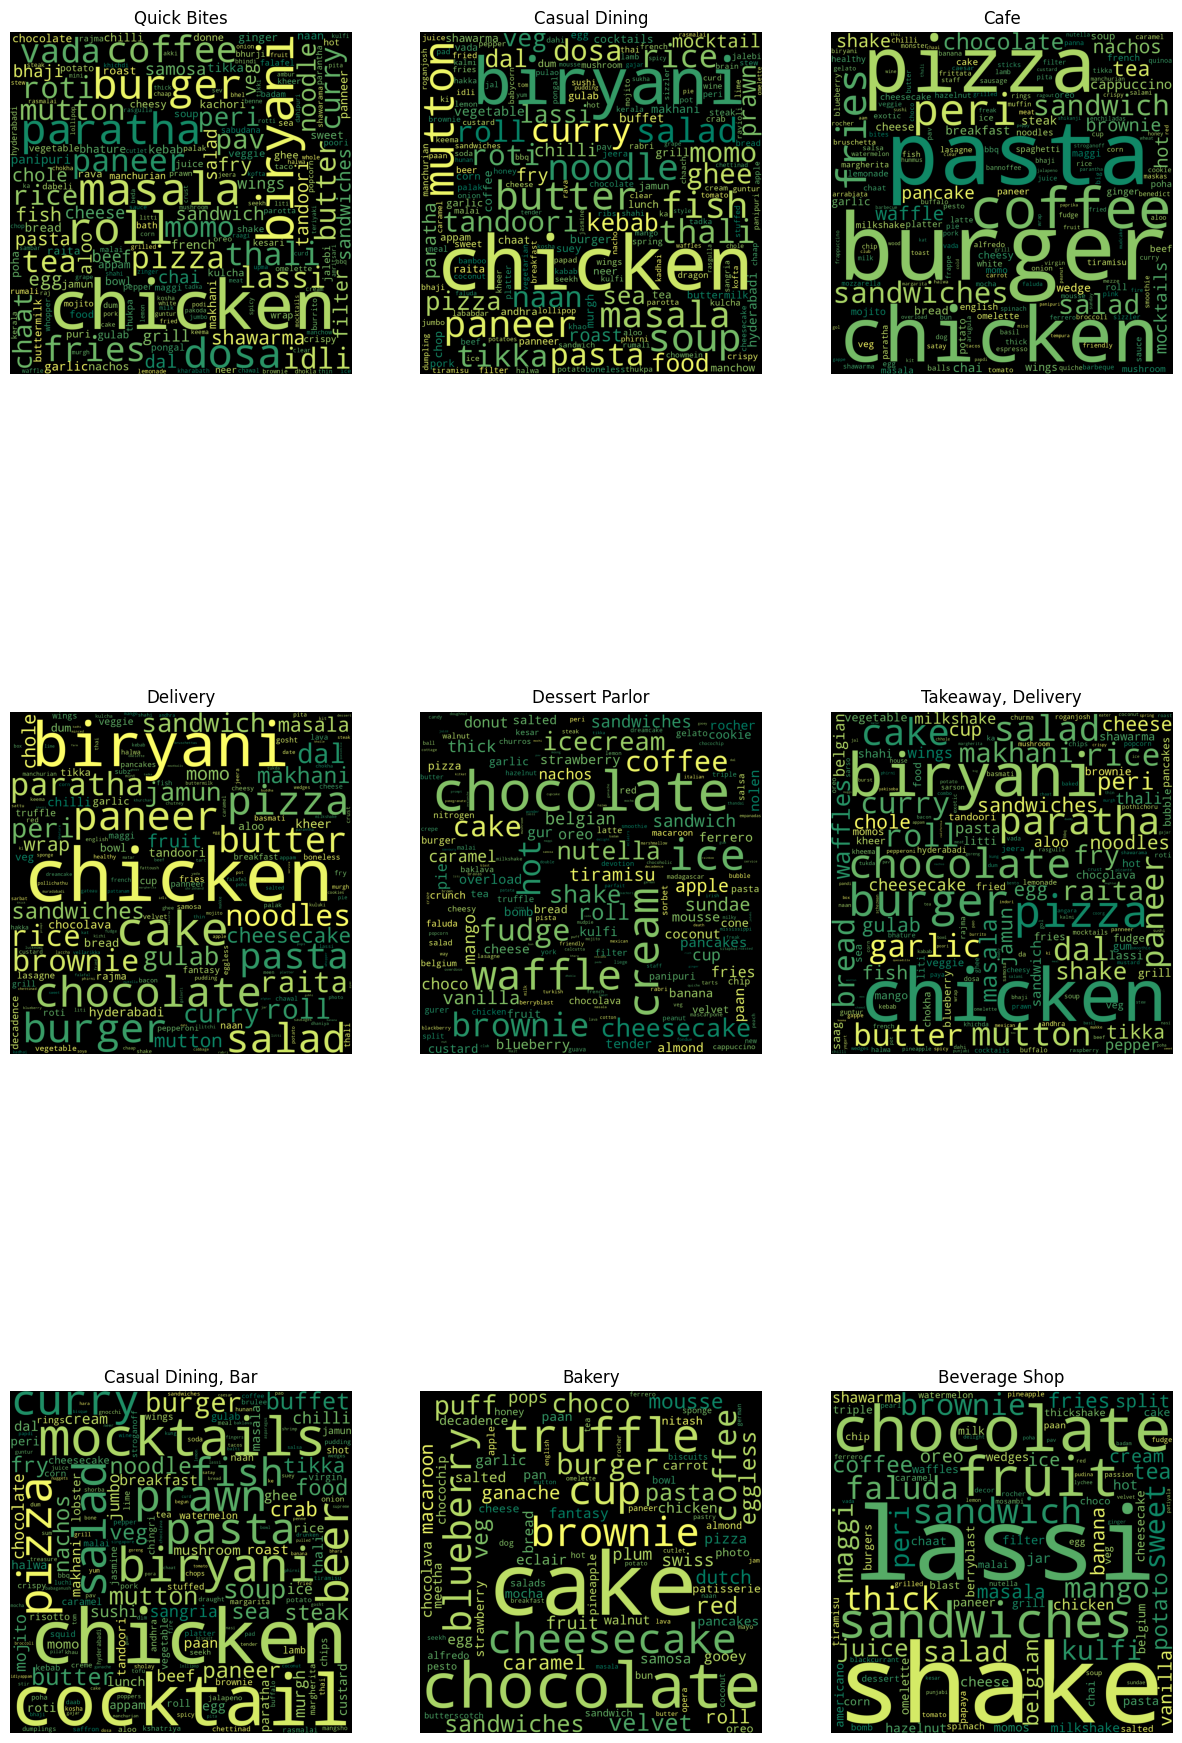

In [ ]:
# Frequently ordered dishes as per restaurant type
stopwords = set(STOPWORDS)
produce_wordcloud(rest)

In [ ]:
def reviewwords(restaurant):
    dataset=dfupd[dfupd['rest_type']==restaurant]
    total_review=' '
    for review in dataset['reviews_list']:
        review=review.lower()
        review=re.sub('[^a-zA-Z]', ' ',review)
        review=re.sub('rated', ' ',review)
        review=re.sub('x',' ',review)
        review=re.sub(' +',' ',review)
        total_review=total_review + str(review)
    wordcloud = WordCloud(width = 800, height = 800,
            background_color ='white',
            stopwords = set(STOPWORDS),
            min_font_size = 10).generate(total_review)
    # plot the WordCloud image
    plt.figure(figsize = (8, 8))
    plt.imshow(wordcloud)
    plt.axis("off")

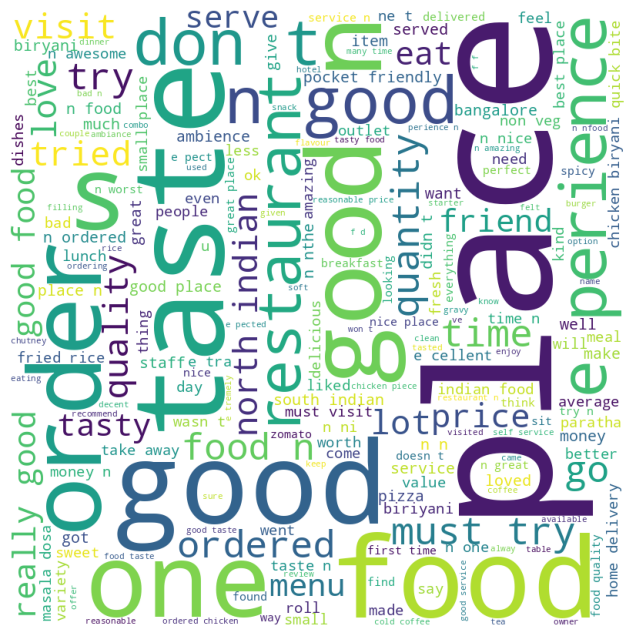

In [ ]:
# Most frequently words used in reviews as per restaurant type "Quick Bites"
reviewwords('Quick Bites')

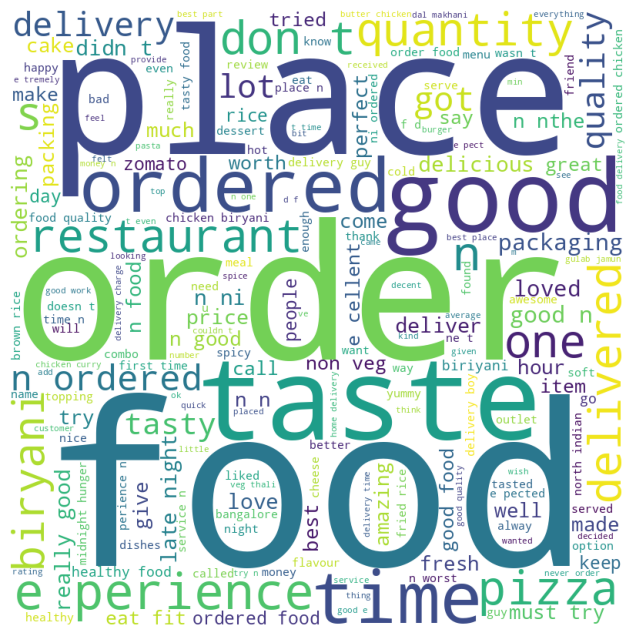

In [ ]:
reviewwords('Delivery')

In [ ]:
# Finding out most frequently words used


# Dropping duplicates

grouped = data.groupby(["name", "address"]).agg({"listed_in(type)" : list})
newdata = pd.merge(grouped, data, on = (["name", "address"]))
newdata["listed_in(type)_x"] = newdata["listed_in(type)_x"].astype(str) # converting unhashable list to a hashable type
newdata.drop_duplicates(subset = ["name", "address", "listed_in(type)_x"], inplace = True)
newdata = newdata.reset_index(drop = True)

# Transforming the ratings column

newdata["rating"] = newdata["rate"].str[:3] # Extracting the first three characters of each string in "rate"
# Removing rows with "NEW" in ratings as it is not a predictable level
newdata = newdata[newdata.rating != "NEW"]
# Dropping rows that have missing values in ratings
newdata = newdata.dropna(subset = ["rating"])
# Converting ratings to a numeric column so we can discretize it
newdata["rating"] = pd.to_numeric(newdata["rating"])
# Discretizing the ratings into a categorical feature with 4 levels

newdata["rating"] = pd.cut(newdata["rating"], bins = [0, 3.0, 3.5, 4.0, 5.0], labels = ["0", "1", "2", "3"])

# Creating a new dataset that has only customer reviews and restaurant ratings
reviews_data = newdata[["reviews_list", "rating"]]

# Converting all the text to lowercase
reviews_data["reviews_list"] = reviews_data["reviews_list"].apply(lambda x: x.lower())

# Creating a regular expression tokenizer that matches only alphabets
# This will return separate words (tokens) from the text
tokenizer = regextoken("[a-zA-Z]+")
# Applying the tokenizer to each row of the reviews
review_tokens = reviews_data["reviews_list"].apply(tokenizer.tokenize)

# Importing and examining the English stopwords directory
# These are common words that typically don't add meaning to the text and can be removed
from nltk.corpus import stopwords
stop = stopwords.words("english")

# Adding custom words to stopwords
stop.extend(["rated", "n", "nan", "x"])
# Removing stopwords from the tokens
review_tokens = review_tokens.apply(lambda x: [token for token in x if token not in stop])
# Concatenating all the reviews
all_reviews = review_tokens.astype(str).str.cat()
cleaned_reviews = tokenizer.tokenize(all_reviews)

# Getting the frequency distribution of individual words in the reviews
fd = FreqDist()
for word in cleaned_reviews:
    fd[word] += 1

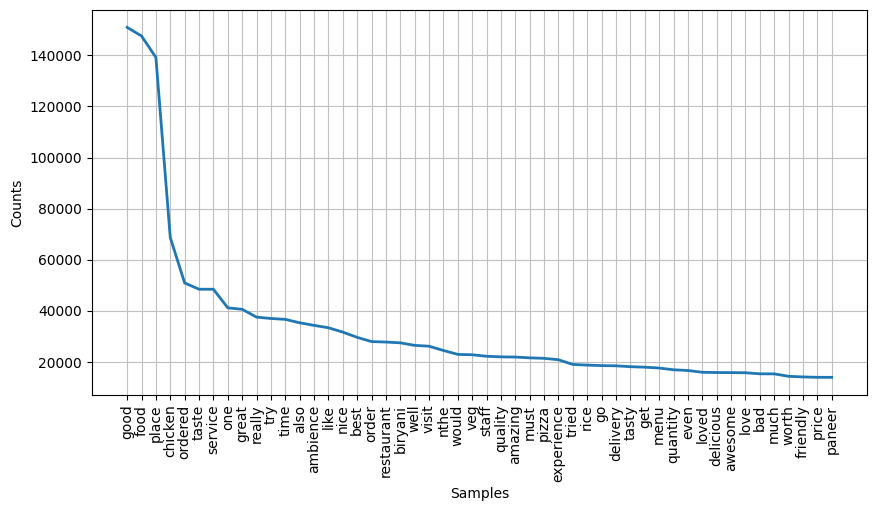

In [ ]:
# Plotting the top 50 most frequent words
plt.figure(figsize = (10, 5))
fd.plot(50)
plt.show()

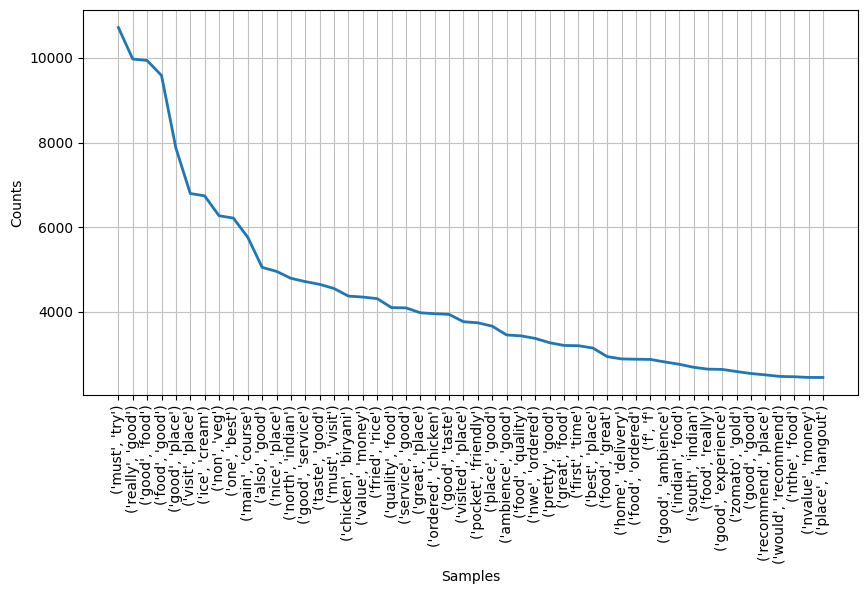

In [ ]:
# Generating bigrams from the reviews
bigrams = bigrams(cleaned_reviews)
# Getting the bigram frequency distribution
fd_bigrams = FreqDist()
for bigram in bigrams:
    fd_bigrams[bigram] += 1

# Plotting the top 50 most frequent bigrams
plt.figure(figsize = (10, 5))
fd_bigrams.plot(50)
plt.show()

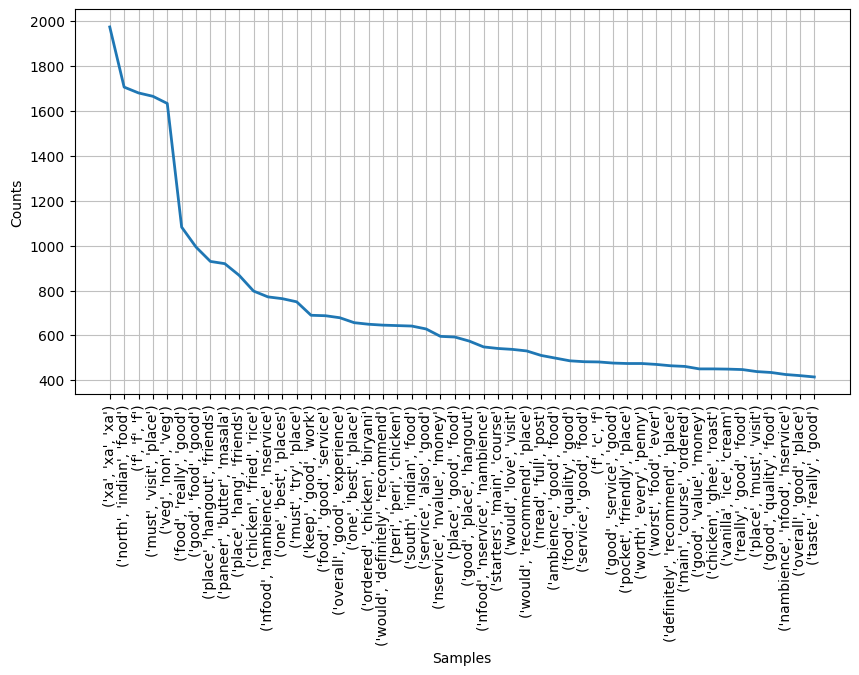

In [ ]:
# Generating trigrams from the reviews
trigrams = trigrams(cleaned_reviews)

fd_trigrams = FreqDist()
for trigram in trigrams:
    fd_trigrams[trigram] += 1

plt.figure(figsize = (10, 5))
fd_trigrams.plot(50)
plt.show()

In [ ]:
# Finding dishes and cuisines as per the budget


# rename columns
data2 = data2.rename(columns={"approx_cost(for two people)": "AvarageCost", "listed_in(type)": "listed_in_type", "listed_in(city)":"listed_in_city"})

# drop some unnecessary columns
drop_list = ["address", "phone", "url", "location"]
data2.drop(drop_list, axis=1, inplace=True)
# Replace New by NaN
data2["rate"] = data2["rate"].replace("NEW", np.nan)
data2.dropna(how="any", inplace=True)
# rate column string to integer convert
X = data2
X["rate"] = X["rate"].astype(str)
X["rate"] = X["rate"].apply(lambda x: x.replace('/5',''))
X["rate"] = X["rate"].apply(lambda x: float(x))

# Avarage cost replace comma
X["AvarageCost"] = X["AvarageCost"].apply(lambda x:x.replace(",",""))
X["AvarageCost"] = X["AvarageCost"].astype("int")

X = X.drop_duplicates(subset="name", keep="first") # drop duplicates restaurent names

highRatYes = X[(X["rate"] >= 4.5) & (X["online_order"] == "Yes")]
ratOnline = highRatYes.shape[0]
b = highRatYes.max()
c = b["rate"]
a = b["name"]
print(f"Name of High Rated Restaurent: {a} and Rate is: {c}")
print(f"Total {ratOnline} restaurents take online order and their rating above 4.5")

highRatNo = X[(X["rate"] >= 4.5) & (X["online_order"] == "No")]
ratOffline = highRatNo.shape[0]
b = highRatNo.max()
c = b["rate"]
a = b["name"]
print(f"Name of High Rated Restaurent: {a} and Rate is: {c}")
print(f"Total {ratOffline} restaurents take offline order and their rating above 4.5")

print("*" * 50)

midRatYes = X[(X["rate"] >= 4.0) & (X["rate"] <= 4.4) & (X["online_order"] == "Yes")]
ratOnline = midRatYes.shape[0]
b = midRatYes.max()
c = b["rate"]
a = b["name"]
print(f"Name of High Rated Restaurent: {a} and Rate is: {c}")
print(f"Total {ratOnline} restaurents take online order and their rating between 4.0 to 4.4")

midRatNo = X[(X["rate"] >= 4.0) & (X["rate"] <= 4.4) & (X["online_order"] == "No")]
ratOffline = midRatNo.shape[0]
b = midRatNo.max()
c = b["rate"]
a = b["name"]
print(f"Name of High Rated Restaurent: {a} and Rate is: {c}")
print(f"Total {ratOffline} restaurents take offline order and their rating between 4.0 to 4.4")

print("*" * 50)

lowRatYes = X[(X["rate"] < 4.0) & (X["online_order"] == "Yes")]
ratOnline = lowRatYes.shape[0]
b = lowRatYes.max()
c = b["rate"]
a = b["name"]
print(f"Name of High Rated Restaurent: {a} and Rate is: {c}")
print(f"Total {ratOnline} restaurents take online order and their rating less 4.0")

lowRatNo = X[(X["rate"] < 4.0) & (X["online_order"] == "No")]
ratOfline = lowRatNo.shape[0]
b = lowRatNo.max()
c = b["rate"]
a = b["name"]
print(f"Name of High Rated Restaurent: {a} and Rate is: {c}")
print(f"Total {ratOfline} restaurents take offline order and their rating less 4.0")

Name of High Rated Restaurent: eat.fit and Rate is: 4.9
Total 44 restaurents take online order and their rating above 4.5
Name of High Rated Restaurent: Yauatcha and Rate is: 4.9
Total 76 restaurents take offline order and their rating above 4.5
**************************************************
Name of High Rated Restaurent: nu.tree and Rate is: 4.4
Total 779 restaurents take online order and their rating between 4.0 to 4.4
Name of High Rated Restaurent: re:cess - Hilton Bangalore Embassy GolfLinks and Rate is: 4.4
Total 495 restaurents take offline order and their rating between 4.0 to 4.4
**************************************************
Name of High Rated Restaurent: Zyara and Rate is: 3.9
Total 1249 restaurents take online order and their rating less 4.0
Name of High Rated Restaurent: i-Bar - The Park Bangalore and Rate is: 3.9
Total 514 restaurents take offline order and their rating less 4.0


In [ ]:
# low budget restaurent
low_budget = X.groupby(['name','rest_type','cuisines', 'listed_in_city', 'rate', 'reviews_list', 'dish_liked'])['AvarageCost'].sum().sort_values(ascending=True).reset_index()
low_budget = low_budget[low_budget["AvarageCost"] <= 1500]

# mid budget restaurent
mid_budget = X.groupby(['name','rest_type','cuisines', 'listed_in_city', 'rate', 'reviews_list', 'dish_liked'])['AvarageCost'].sum().sort_values(ascending=True).reset_index()
mid_budget = mid_budget[(mid_budget["AvarageCost"] > 1500) & (mid_budget["AvarageCost"] <= 3000)]

# High budget restaurent
high_budget = X.groupby(['name','rest_type','cuisines', 'listed_in_city', 'rate', 'reviews_list', 'dish_liked'])['AvarageCost'].sum().sort_values(ascending=True).reset_index()
high_budget = high_budget[(high_budget["AvarageCost"] > 3000) & (high_budget["AvarageCost"] <= 6000)]

def cloud_word(budget):
    text = " ".join(dish for dish in budget["cuisines"])
    wc = WordCloud(max_font_size=100,colormap="summer", height=300, width=400, random_state=42, background_color='#151515')
    wc.generate(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")

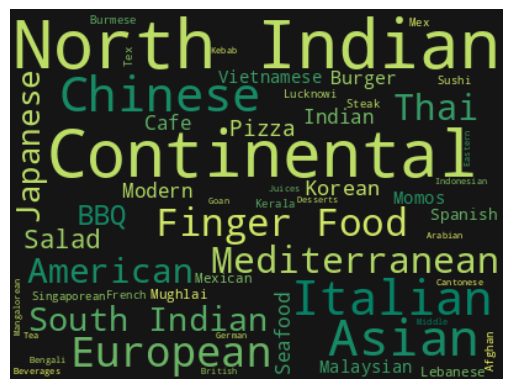

In [ ]:
# medium Avarage cost and cuisines
cloud_word(mid_budget)

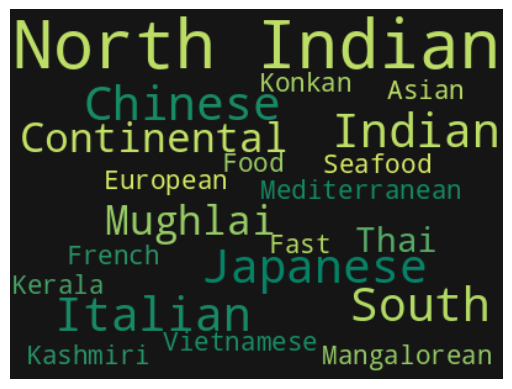

In [ ]:
# High Avarage cost and cuisines
cloud_word(high_budget)

In [ ]:
def dish_like(budget):
    dish_liked = " ".join(f for f in budget["dish_liked"])
    wc_ = WordCloud(max_font_size=100,colormap="Set2", height=300, width=400, random_state=42, background_color='#151515')
    wc_.generate(dish_liked)
    plt.imshow(wc_, interpolation="bilinear")
    plt.axis("off")

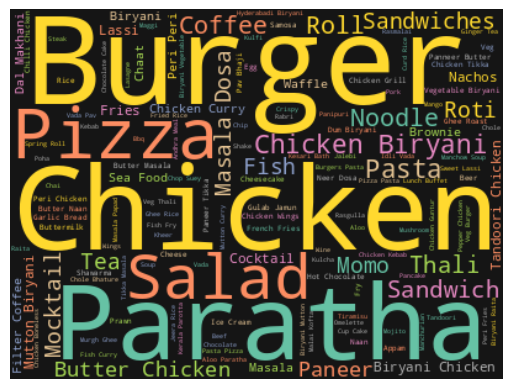

In [ ]:
# Low avarage Cost and dishes people liked in the restaurant
dish_like(low_budget)

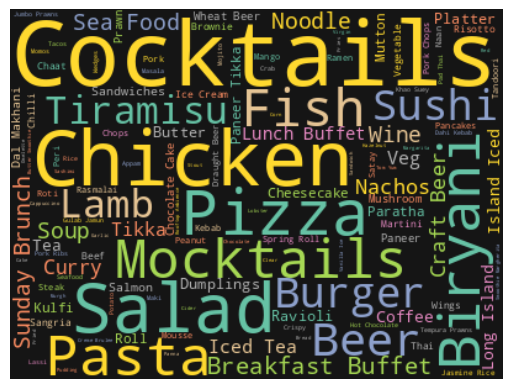

In [ ]:
# Medium avarage Cost and dishes people liked in the restaurant
dish_like(mid_budget)

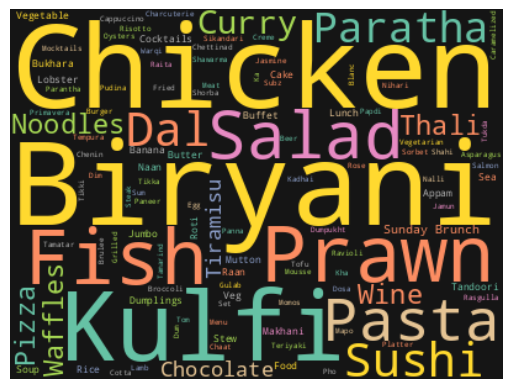

In [ ]:
# High avarage Cost and dishes people liked in the restaurant

dish_like(high_budget)

#**BUILDING THE MODEL**

In [ ]:
d=pd.read_csv("/content/drive/MyDrive/zomato.csv")

In [ ]:
df=d.copy()

In [ ]:
len(df)

51717

In [ ]:
df = df.drop(['url','name', 'address', 'phone','location','reviews_list','dish_liked','menu_item'], axis=1)


In [ ]:
df.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   online_order                 51717 non-null  object
 1   book_table                   51717 non-null  object
 2   rate                         43942 non-null  object
 3   votes                        51717 non-null  int64 
 4   rest_type                    51490 non-null  object
 5   cuisines                     51672 non-null  object
 6   approx_cost(for two people)  51371 non-null  object
 7   listed_in(type)              51717 non-null  object
 8   listed_in(city)              51717 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.6+ MB


In [ ]:
print(df['rest_type'].unique())
print(df['listed_in(city)'].unique())
print(df['listed_in(type)'].unique())

['Casual Dining' 'Cafe, Casual Dining' 'Quick Bites' 'Casual Dining, Cafe'
 'Cafe' 'Quick Bites, Cafe' 'Cafe, Quick Bites' 'Delivery' 'Mess'
 'Dessert Parlor' 'Bakery, Dessert Parlor' 'Pub' 'Bakery'
 'Takeaway, Delivery' 'Fine Dining' 'Beverage Shop' 'Sweet Shop' 'Bar'
 'Beverage Shop, Quick Bites' 'Confectionery' 'Quick Bites, Beverage Shop'
 'Dessert Parlor, Sweet Shop' 'Bakery, Quick Bites'
 'Sweet Shop, Quick Bites' 'Kiosk' 'Food Truck'
 'Quick Bites, Dessert Parlor' 'Beverage Shop, Dessert Parlor' 'Takeaway'
 'Pub, Casual Dining' 'Casual Dining, Bar' 'Dessert Parlor, Beverage Shop'
 'Quick Bites, Bakery' 'Dessert Parlor, Quick Bites'
 'Microbrewery, Casual Dining' 'Lounge' 'Bar, Casual Dining' 'Food Court'
 'Cafe, Bakery' nan 'Dhaba' 'Quick Bites, Sweet Shop' 'Microbrewery'
 'Food Court, Quick Bites' 'Pub, Bar' 'Casual Dining, Pub' 'Lounge, Bar'
 'Food Court, Dessert Parlor' 'Casual Dining, Sweet Shop'
 'Food Court, Casual Dining' 'Casual Dining, Microbrewery'
 'Sweet Shop, Desser

In [ ]:
df['num_cuisines'] = df['cuisines'].str.split(',').str.len()


In [ ]:
df.head()

online_order book_table   rate  votes            rest_type  \
0          Yes        Yes  4.1/5    775        Casual Dining   
1          Yes         No  4.1/5    787        Casual Dining   
2          Yes         No  3.8/5    918  Cafe, Casual Dining   
3           No         No  3.7/5     88          Quick Bites   
4           No         No  3.8/5    166        Casual Dining   

                         cuisines approx_cost(for two people) listed_in(type)  \
0  North Indian, Mughlai, Chinese                         800          Buffet   
1     Chinese, North Indian, Thai                         800          Buffet   
2          Cafe, Mexican, Italian                         800          Buffet   
3      South Indian, North Indian                         300          Buffet   
4        North Indian, Rajasthani                         600          Buffet   

  listed_in(city)  num_cuisines  
0    Banashankari           3.0  
1    Banashankari           3.0  
2    Banashankari           3.0  
3    Banashankari           2.0  
4    Banashankari           2.0

In [ ]:
df = df.drop(['cuisines'], axis=1)


# **CLEANING THE DATASET**

In [ ]:
df=df[df['rate'] !='NEW']
df=df[df['rate'] !='-']
data = df.dropna(subset=['rest_type', 'num_cuisines'])
data.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)',
       'num_cuisines'],
      dtype='object')

In [ ]:
# Remove '/5' from 'rate' and convert to numeric
data['rate'] = data['rate'].str.replace('/5', '')
data['rate'] = pd.to_numeric(data['rate'], errors='coerce')
# Convert 'votes' to numeric
data['votes'] = pd.to_numeric(data['votes'], errors='coerce')
# Remove commas from 'approx_cost(for two people)' and convert to numeric
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].str.replace(',', '')
data['approx_cost(for two people)'] = pd.to_numeric(data['approx_cost(for two people)'], errors='coerce')

In [ ]:
def clean_categorical_columns(value, common_values):
    if pd.isnull(value):
        return pd.NaT
    elif value in common_values:
        return value
    else:
        return 'Other'

# Keep top 10 most common locations, restaurant types, cuisines,cities and types
top_rest_types = data['rest_type'].value_counts()[:10].index.tolist()
top_types = data['listed_in(type)'].value_counts()[:10].index.tolist()
top_cities=data['listed_in(city)'].value_counts()[:10].index.tolist()
#clean all these columns
data['rest_type'] = data['rest_type'].apply(clean_categorical_columns, common_values=top_rest_types)
data['listed_in(type)'] = data['listed_in(type)'].apply(clean_categorical_columns, common_values=top_types)
data['listed_in(city)'] = data['listed_in(city)'].apply(clean_categorical_columns, common_values=top_cities)


In [ ]:
# Impute missing values in 'online_order' and 'book_table' with the mode
for col in ['online_order', 'book_table']:
    data[col] = data[col].fillna(data[col].mode().iloc[0])

# Impute missing values in 'rate' and 'votes' with the median
for col in ['rate', 'votes']:
    data[col] = data[col].fillna(data[col].median())
# Impute missing values in 'approx_cost(for two people)' with the median
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].fillna(data['approx_cost(for two people)'].median())

# Impute missing values in 'location', 'rest_type', 'cuisines', and 'listed_in(type)' with 'Unknown'
for col in ['rest_type','listed_in(type)','listed_in(city)']:
    data[col] = data[col].fillna('Unknown')

# Check for missing values in the data again
data.isna().sum()
cleaned_df=data.copy()

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49191 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 49191 non-null  object 
 1   book_table                   49191 non-null  object 
 2   rate                         49191 non-null  float64
 3   votes                        49191 non-null  int64  
 4   rest_type                    49191 non-null  object 
 5   approx_cost(for two people)  49191 non-null  float64
 6   listed_in(type)              49191 non-null  object 
 7   listed_in(city)              49191 non-null  object 
 8   num_cuisines                 49191 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 3.8+ MB


In [ ]:
cleaned_df['num_cuisines'] = cleaned_df['num_cuisines'].astype(int)


#**REMOVING ROWS HAVING VOTES<5**

In [ ]:
rows_before = len(cleaned_df)
cleaned_df = cleaned_df[cleaned_df['votes'] >= 5]
rows_after = len(cleaned_df)
print(f"Rows dropped: {rows_before - rows_after}")
print(f"Remaining rows: {rows_after}")


Rows dropped: 8810
Remaining rows: 40381


In [ ]:
new_df = cleaned_df.copy()


In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(lambda x: np.log1p(x))
new_df['votes_log'] = log_transformer.fit_transform(new_df[['votes']])


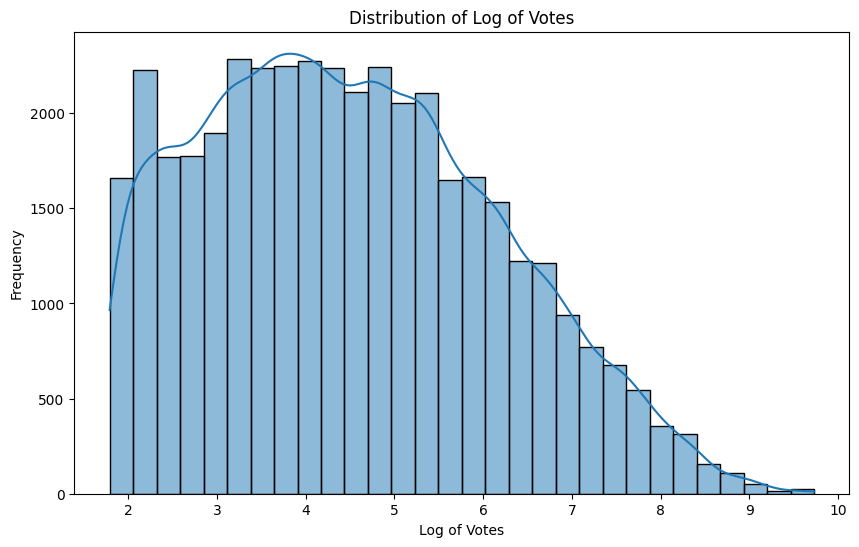

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(new_df['votes_log'], bins=30, kde=True)
plt.xlabel('Log of Votes')
plt.ylabel('Frequency')
plt.title('Distribution of Log of Votes')
plt.show()


#**GENERATING POPULARITY VALUE=VOTESLOG*RATING**

In [ ]:
new_df['votes_rate_log'] = new_df['votes_log'] * new_df['rate']

In [ ]:
new_df = new_df.drop('votes_log', axis=1)

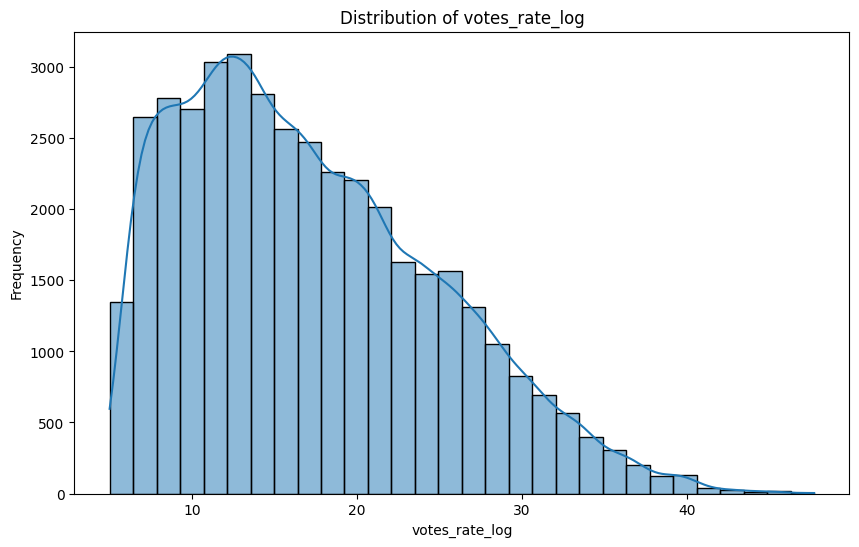

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(new_df['votes_rate_log'], bins=30, kde=True)
plt.xlabel('votes_rate_log')
plt.ylabel('Frequency')
plt.title('Distribution of votes_rate_log')
plt.show()


In [ ]:
new_df.head()

online_order book_table  rate  votes      rest_type  \
0          Yes        Yes   4.1    775  Casual Dining   
1          Yes         No   4.1    787  Casual Dining   
2          Yes         No   3.8    918          Other   
3           No         No   3.7     88    Quick Bites   
4           No         No   3.8    166  Casual Dining   

   approx_cost(for two people) listed_in(type) listed_in(city)  num_cuisines  \
0                        800.0          Buffet           Other             3   
1                        800.0          Buffet           Other             3   
2                        800.0          Buffet           Other             3   
3                        300.0          Buffet           Other             2   
4                        600.0          Buffet           Other             2   

   votes_rate_log  
0       27.282025  
1       27.344942  
2       25.928487  
3       16.607955  
4       19.448376

#**CONVERTING POPULARITY INTO A CATEGORICAL VALUE**

In [ ]:
import pandas as pd
new_df['votes_rate_log_class'] = pd.cut(new_df['votes_rate_log'], bins=3, labels=["un-popular","popular","famous"])

In [ ]:
new_df.head(5)

online_order book_table  rate  votes      rest_type  \
0          Yes        Yes   4.1    775  Casual Dining   
1          Yes         No   4.1    787  Casual Dining   
2          Yes         No   3.8    918          Other   
3           No         No   3.7     88    Quick Bites   
4           No         No   3.8    166  Casual Dining   

   approx_cost(for two people) listed_in(type) listed_in(city)  num_cuisines  \
0                        800.0          Buffet           Other             3   
1                        800.0          Buffet           Other             3   
2                        800.0          Buffet           Other             3   
3                        300.0          Buffet           Other             2   
4                        600.0          Buffet           Other             2   

   votes_rate_log votes_rate_log_class  
0       27.282025              popular  
1       27.344942              popular  
2       25.928487              popular  
3       16.607955           un-popular  
4       19.448376              popular

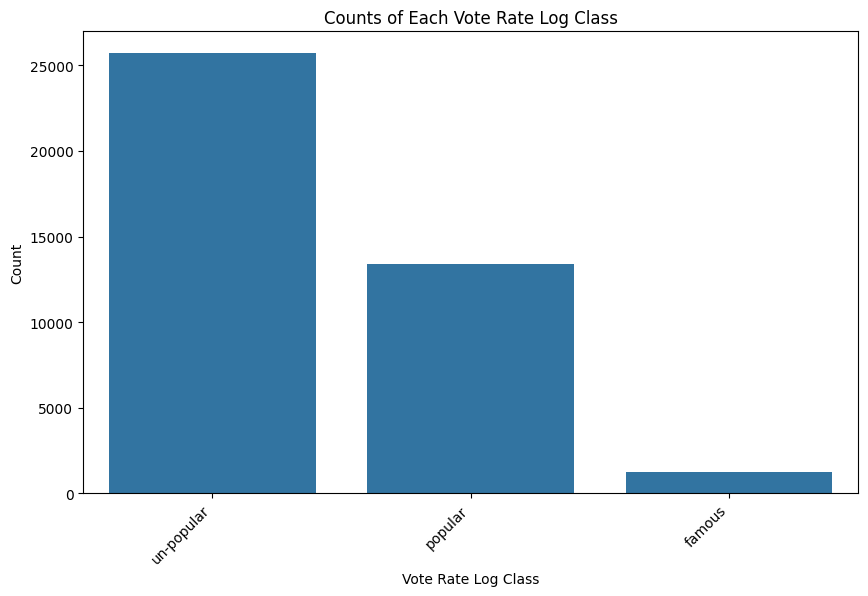

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='votes_rate_log_class', data=new_df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Vote Rate Log Class')
plt.ylabel('Count')
plt.title('Counts of Each Vote Rate Log Class')
plt.show()

In [ ]:
new_df = new_df.drop('votes_rate_log', axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = new_df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    new_df[col] = le.fit_transform(new_df[col])
    label_encoders[col] = le

In [ ]:
print(categorical_cols)

Index(['book_table', 'rest_type', 'listed_in(type)', 'listed_in(city)'], dtype='object')


In [ ]:
import pickle
# Save the label encoders
for col, le in label_encoders.items():
    with open(f'{col}_label_encoder.pkl', 'wb') as f:
        pickle.dump(le, f)

In [ ]:
from google.colab import files
for col, le in label_encoders.items():
    files.download(f'{col}_label_encoder.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# # Select the predictors and the target variable

X = new_df.drop(columns='votes_rate_log_class')

y = new_df['votes_rate_log_class']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training set and the test set
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((32304, 9), (8077, 9), (32304,), (8077,))

In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# Define the models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('SGD Classifier', SGDClassifier(random_state=42)),
    ('Linear SVC', LinearSVC(random_state=42)),
    ('SVC', SVC(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=10, random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
]

# Train, predict, and evaluate each model
model_scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='macro')
    recall = recall_score(y_test, y_pred,average='macro')
    f1 = f1_score(y_test, y_pred,average='macro')
    model_scores.append((name, accuracy, precision, recall, f1))

# Create a dataframe to store the scores of all models
model_scores_df = pd.DataFrame(model_scores, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the scores of all models
model_scores_df


Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.927696   0.869221  0.854711  0.861711
1       SGD Classifier  0.819364   0.880199  0.621234  0.613824
2           Linear SVC  0.961743   0.941518  0.861651  0.894585
3                  SVC  0.926829   0.886952  0.873937  0.880292
4        Decision Tree  0.999752   0.999750  0.999871  0.999810
5        Random Forest  0.999629   0.999624  0.998603  0.999113

In [ ]:
model=LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Assuming X_test is your test dataset and y_test is the corresponding target variable
# Get the first row of the test dataset
first_row = X_test.iloc[[0]]

# Make a prediction for the first row
prediction = model.predict(first_row)

# Print the prediction
print("Prediction for the first row:", prediction[0])

# You can also print the actual target value for comparison
print("Actual value for the first row:", y_test.iloc[0])


Prediction for the first row: un-popular
Actual value for the first row: un-popular


In [ ]:
import pickle
with open('zomato_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


In [ ]:
from google.colab import files

files.download('zomato_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>